## Assignment 3: Predicting Fuel Efficiency with Linear Regression

Objective: The objective of this assignment is to use the "mtcars" dataset to perform linear
regression analysis and predict the fuel efficiency (miles per gallon) of car models based on
their specifications.

Dataset: "mtcars" Dataset

Description: The "mtcars" dataset contains data on various car models from the 1970s,
including 32 observations and 11 variables. The variables include characteristics like
horsepower, weight, and number of cylinders, as well as the target variable, miles per gallon
(mpg), which represents the car's fuel efficiency

Module: CS401 Machine Learning

Student Name: Precious Deremo

Student Number: 20325666

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sys

## Data Exploration and Preparation (10 points):

1.1 Load the "mtcars" dataset and describe its structure, including the number of
observations and variables.

I downloaded the dataset from a github repository as there was no indication of importing it from a library like with the iris dataset. I also found the datset on kaggle for comparision and they were the same so I am hoping this is the right setthe assignment is based on.

In [2]:
mtcars_dataset = pd.read_csv('mtcars.csv')

In [3]:
mtcars_dataset

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


This is an explanation I found online for what all the variables stand for and mean. Link is in references.

Format
A data frame with 32 observations on 11 (numeric) variables.

[, 1]	mpg	=> Miles/(US) gallon

[, 2]	cyl =>	Number of cylinders

[, 3]	disp =>	Displacement (cu.in.)

[, 4]	hp	=> Gross horsepower

[, 5]	drat =>	Rear axle ratio

[, 6]	wt =>	Weight (1000 lbs)

[, 7]	qsec =>	1/4 mile time

[, 8]	vs =>	Engine (0 = V-shaped, 1 = straight)

[, 9]	am =>	Transmission (0 = automatic, 1 = manual)

[, 10]	gear =>	Number of forward gears

[, 11]  carb =>  no. of carburetors.

1.2 Explore the dataset by calculating summary statistics and visualizing the data. Create scatter plots to examine the relationships between the independent variables and the target variable (mpg).

In [4]:
mtcars_dataset.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
mtcars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
print(f"There are {len(mtcars_dataset)} rows and {len(mtcars_dataset.columns)} columns in the mtcars_dataset.")

There are 32 rows and 12 columns in the mtcars_dataset.


A majority of the data seems lie in the 15-20 range when it comes to miles per gallon (mpg). According to the mean value, the mean value of mpg is 20.

Text(0.5, 1.0, 'Distribution of MPG')

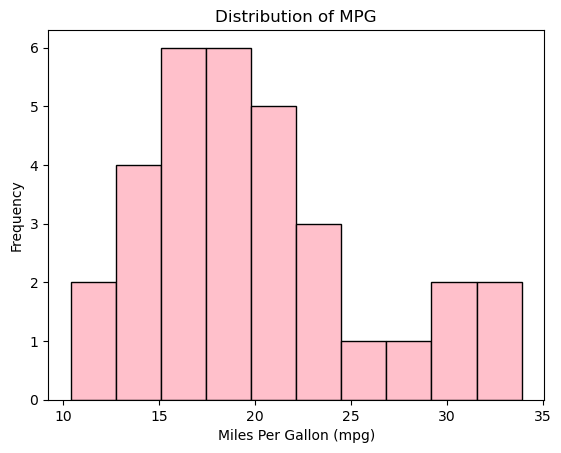

In [7]:
mtcars_dataset['mpg'].hist(color='pink', grid=False, edgecolor='black')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')

This pairplot represents all the data correlation points. A few of them look interesting so I decided to replot them individually below this massive pairplot for further observation.

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


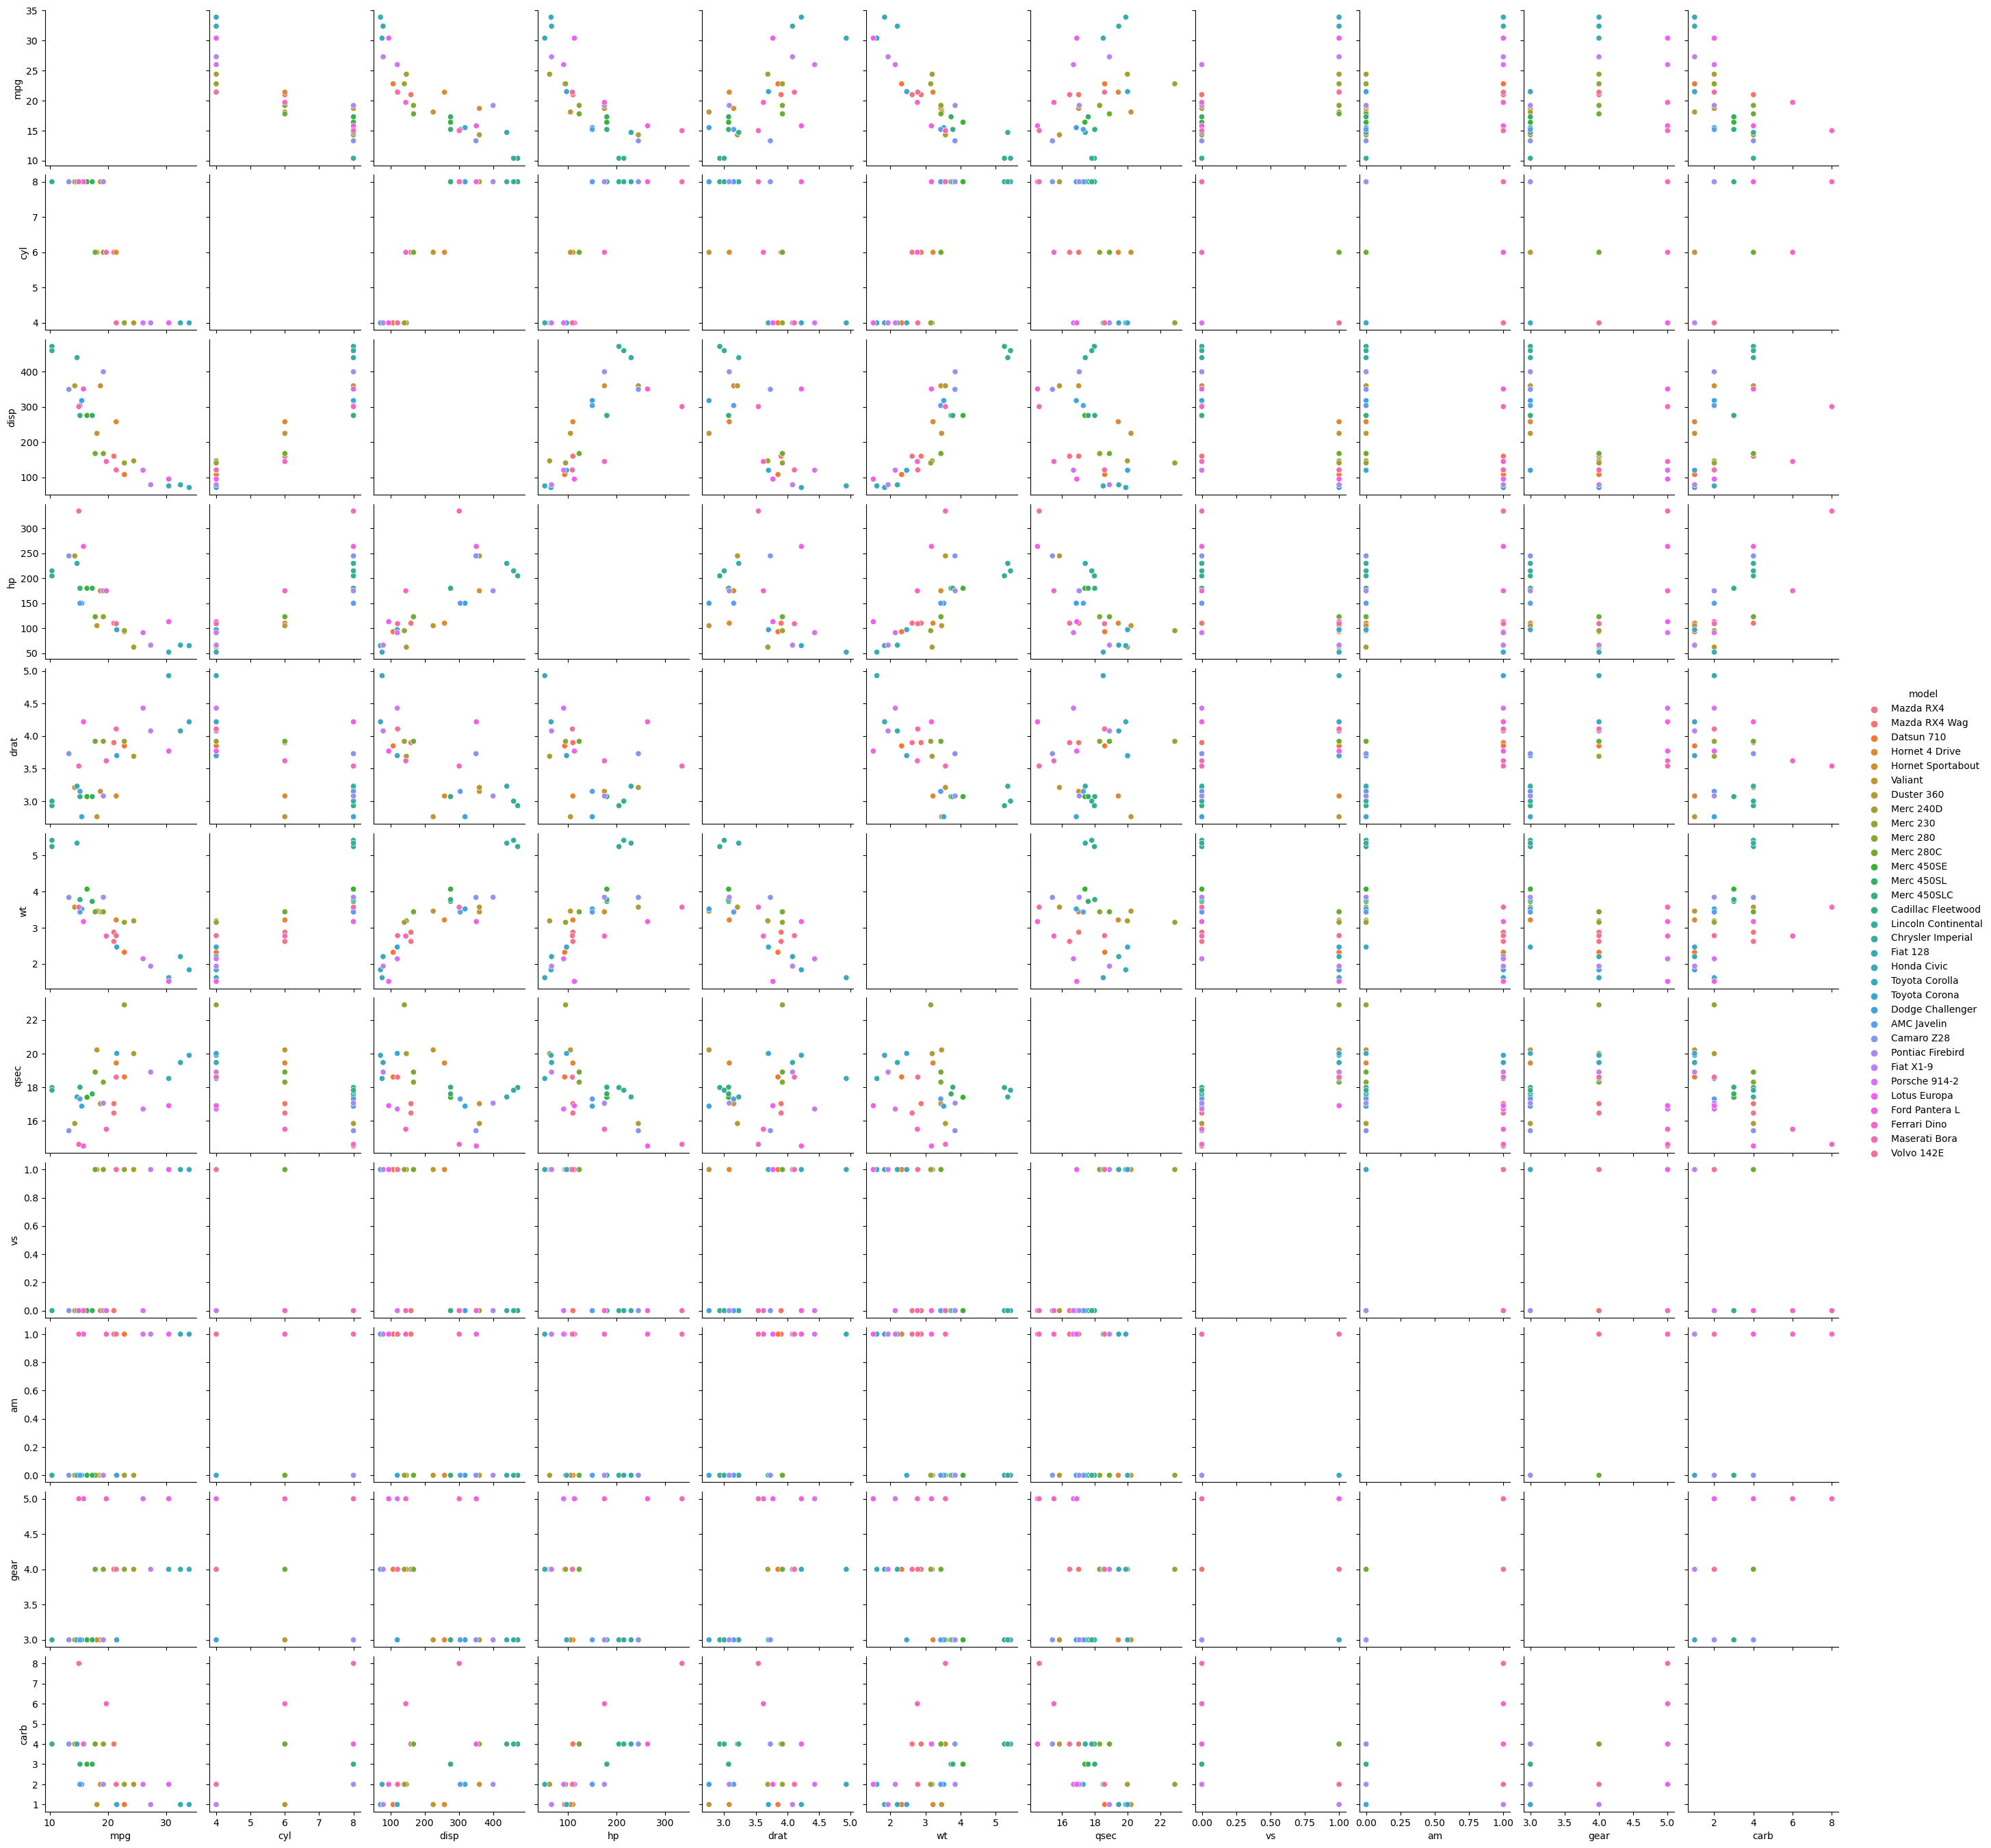

In [8]:
sns.pairplot(mtcars_dataset, hue="model")

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


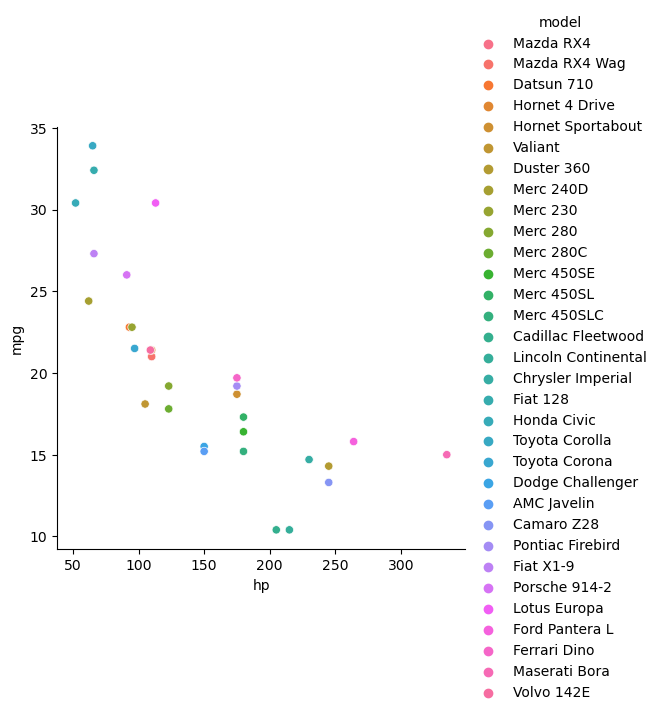

<Figure size 2000x1000 with 0 Axes>

In [9]:
sns.relplot(x = "hp", y = "mpg", hue = "model", data= mtcars_dataset)
plt.figure(figsize=(20,10))
plt.show()

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


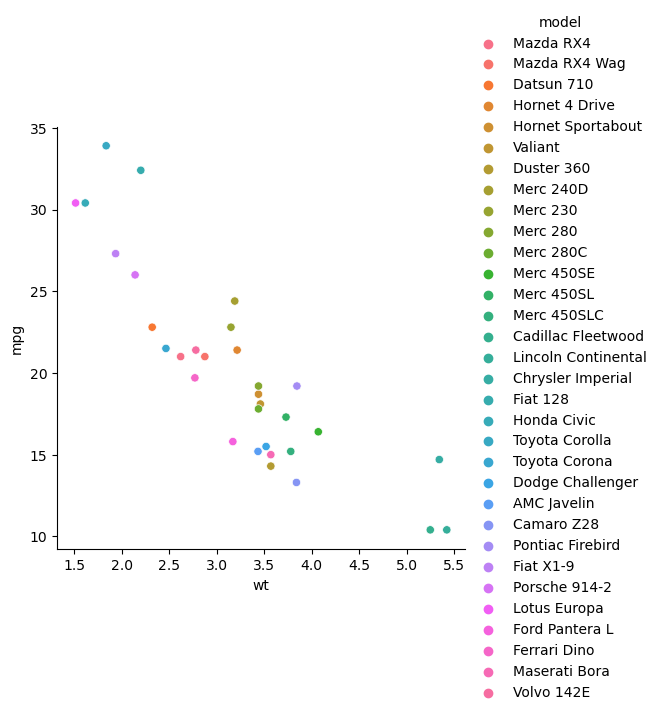

<Figure size 2000x1000 with 0 Axes>

In [10]:
sns.relplot(x = "wt", y = "mpg", hue = "model", data= mtcars_dataset)
plt.figure(figsize=(20,10))
plt.show()

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


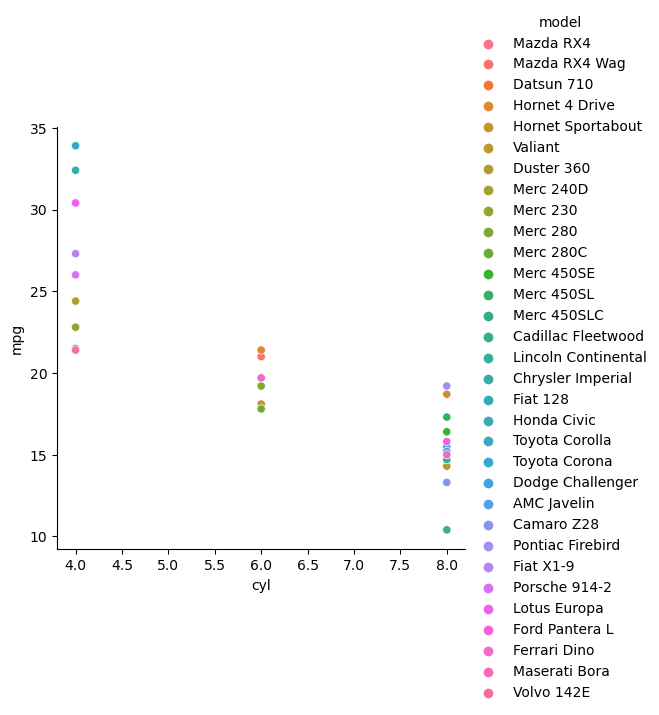

<Figure size 2000x1000 with 0 Axes>

In [11]:
sns.relplot(x = "cyl", y = "mpg", hue = "model", data= mtcars_dataset)
plt.figure(figsize=(20,10))
plt.show()

In [12]:
print(mtcars_dataset.query('mpg > 33'))

             model   mpg  cyl  disp  hp  drat     wt  qsec  vs  am  gear  carb
19  Toyota Corolla  33.9    4  71.1  65  4.22  1.835  19.9   1   1     4     1


In [13]:
print(mtcars_dataset.query('mpg < 11'))

                  model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   

    gear  carb  
14     3     4  
15     3     4  


Toyota Corrolla seems to be the highest model for miles for gallon. As we can observe from the scatter plots as the weight decreases the miles for gallon increase. The Cadillac and the Lincoln both have low miles per gallon but higher weight compared to the Toyota. This may mean that weight could have a strong association with miles per gallon.

Taking out the model column so i can show a correlation matrix for all the numeric varaibles in the mt cars dataset in order to see a visual representation of the independent and dependant variables. I print out the first few rows just to see if it worked. Note it worked for the full set, I just wanted to decrease the space used up.

In [14]:
#iris_dataframe.corr
mtcars_subset = mtcars_dataset.drop(columns="model")
mtcars_subset.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Correlation Matrix

<Axes: >

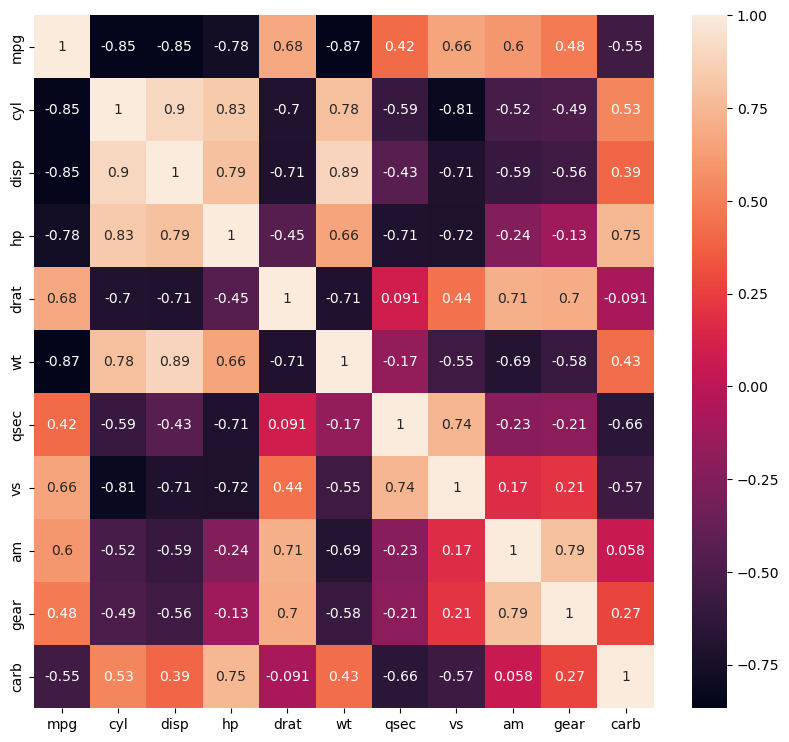

In [15]:
#iris_dataframe.corr

fig, ax = plt.subplots(figsize =(10,9))
sns.heatmap(mtcars_subset.corr(), annot=True, ax=ax)

I found the correlation metric online to help me gauge the correlation of the mtcars dataset. 

Perfectly Positive Correlation: When correlation value is exactly 1.

Positive Correlation: When correlation value falls between 0 to 1.

No Correlation: When correlation value is 0.

Negative Correlation: When correlation value falls between -1 to 0.

Perfectly Negative Correlation: When correlation value is exactly -1.

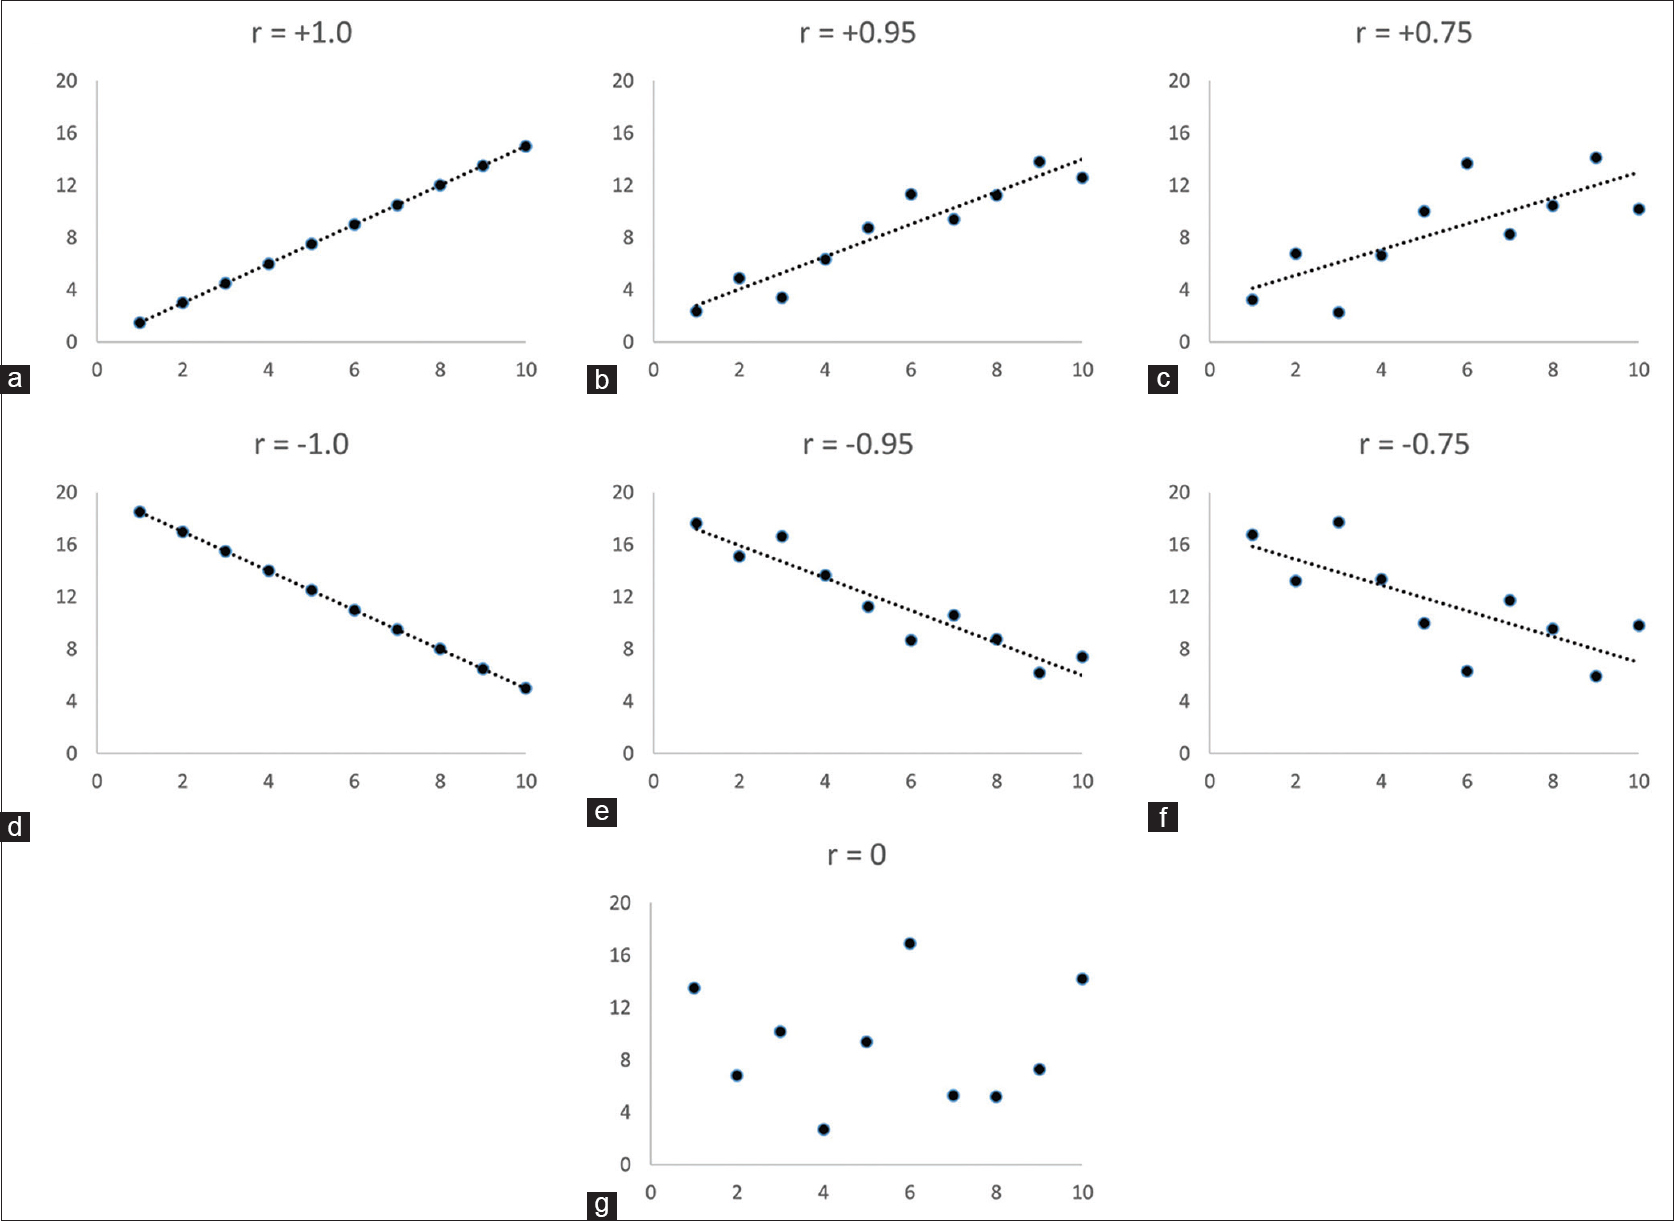

In [16]:
from IPython import display
display.Image("correlation metric.jpg")

I decided to plot out a few of the ones that had a strong correlation with mpg such as cyl, disp, wt, hp and drat.

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


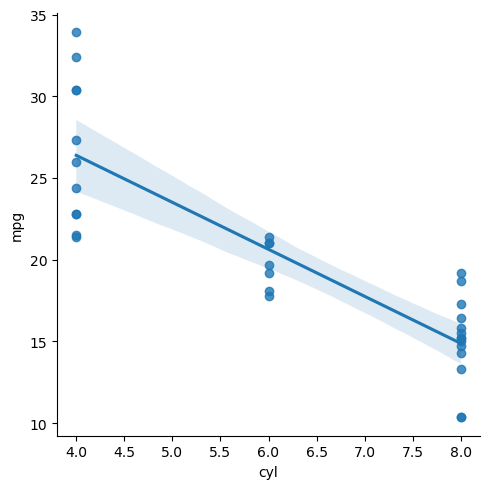

In [17]:
sns.lmplot(x="cyl", y="mpg", data=mtcars_dataset)

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


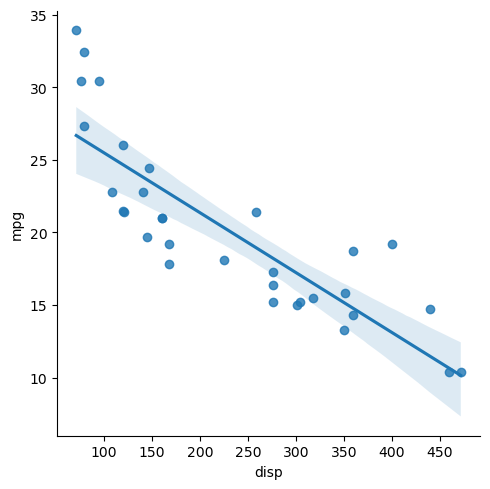

In [18]:
sns.lmplot(x="disp", y="mpg", data=mtcars_dataset)

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


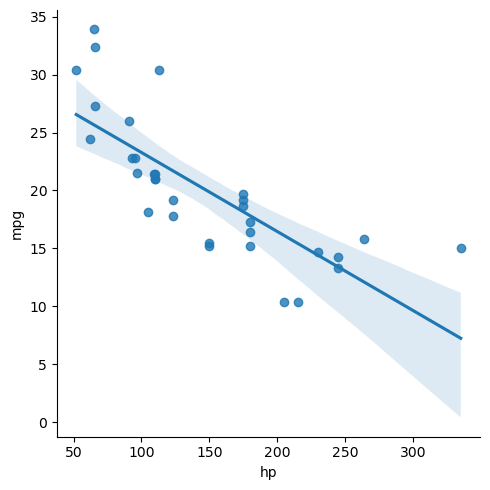

In [19]:
sns.lmplot(x="hp", y="mpg", data=mtcars_dataset)

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


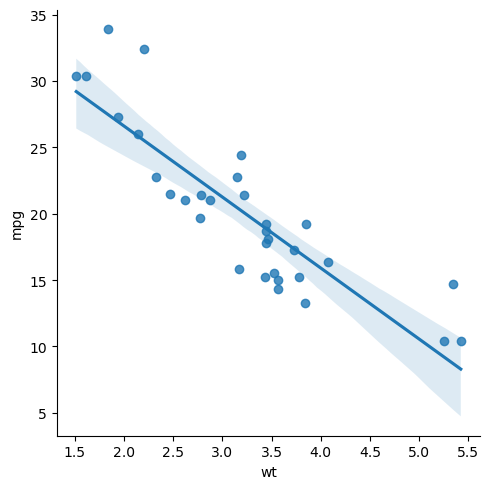

In [20]:
sns.lmplot(x="wt", y="mpg", data=mtcars_dataset)

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


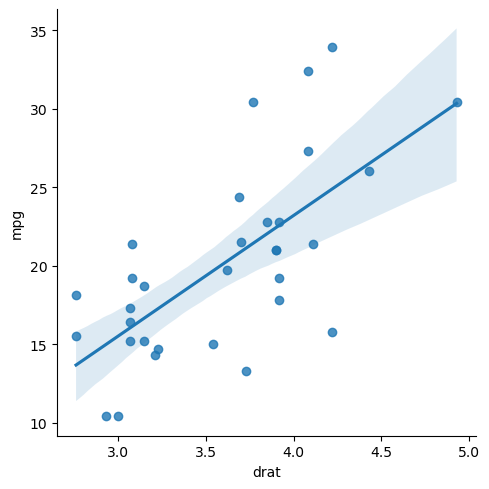

In [21]:
sns.lmplot(x="drat", y="mpg", data=mtcars_dataset)

According to the Correlation matrix and metrics I have provided the variables hp,wt, cyl and disp all have a strong negative linear relationship with the target variable mpg. The variable drat has a medium strength linear relationship with the target variable mpg. We shall choose one of these for values and implement it into a simple linear regression model to train it to predict the target variable outcomes.

## Simple Linear Regression (30 points):

2.1 Select one independent variable from the "mtcars" dataset that you believe
may have a strong linear relationship with the target variable (mpg).

I shall select weight as it has a strong negative relationship with mpg as I have shown above.

In [22]:
from sklearn.model_selection import train_test_split

2.2 Implement a simple linear regression model to predict mpg using the selected
independent variable.

Weight will be my x value and Y will be my target value. I split the train test set into 80% training and 20% testing. Im not sure if we are supposed to go lower since it is a smaller dataset but I may change up the numbers and record the difference. For now, the model seems to be able to explain 75% of the data according to the r2 score metrics which I am recording now in case I change the variance later.

In [23]:
x = mtcars_dataset.wt
Y = mtcars_dataset.mpg


x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size= 0.2, random_state= 42)

According to tutorials I was following online, we need to reshape the data so there is 1 column but as many n rows as possible to make it into a 1 dimensional array to feed into the linear regression model.

In [24]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
 

I import the linear regression model and fit the data into it to train the model.

In [25]:
from sklearn.linear_model import LinearRegression
linearReg_model = LinearRegression()
linearReg_model.fit(x_train, Y_train)

LinearRegression()

2.3 Calculate the model's coefficients (slope and intercept) and evaluate its
performance using appropriate regression evaluation metrics (on testing
dataset).

Checking the training data

In [26]:

#intercept in maths
c = linearReg_model.intercept_
c

36.93731031351841

In [27]:
#slope in maths
m = linearReg_model.coef_
m

array([-5.3369414])

Predicted Values for the training set

In [28]:
# y = mx + c -> slope formula

Y_pred = (m*x_train) + c
Y_pred

array([[26.6103287 ],
       [17.03051889],
       [22.95452384],
       [18.5782319 ],
       [ 8.41135853],
       [18.47149307],
       [16.76367182],
       [15.21595881],
       [16.44345534],
       [21.59360379],
       [24.55560626],
       [25.51625572],
       [19.77904371],
       [18.15127658],
       [28.86251797],
       [18.6049166 ],
       [28.31814995],
       [22.10061322],
       [23.78174976],
       [19.91246725],
       [18.5782319 ],
       [ 8.91836796],
       [20.01920607],
       [27.14402284],
       [17.88442951]])

In [29]:
y_pred1 = linearReg_model.predict(x_train)
y_pred1

array([26.6103287 , 17.03051889, 22.95452384, 18.5782319 ,  8.41135853,
       18.47149307, 16.76367182, 15.21595881, 16.44345534, 21.59360379,
       24.55560626, 25.51625572, 19.77904371, 18.15127658, 28.86251797,
       18.6049166 , 28.31814995, 22.10061322, 23.78174976, 19.91246725,
       18.5782319 ,  8.91836796, 20.01920607, 27.14402284, 17.88442951])

the predicted values from the model for the training data and the manually calculated values seem to match which means the model is doing well on its predictions.

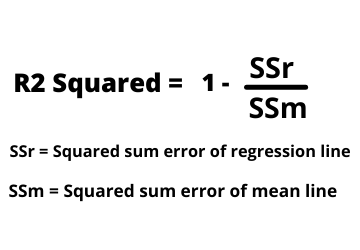

In [30]:
from IPython import display
display.Image("r_squared formula.png")

In [31]:
r_sq = linearReg_model.score(x_train, Y_train)
r_sq

0.7701379909791617

Showing the linear correlation between weight and miles per gallon.

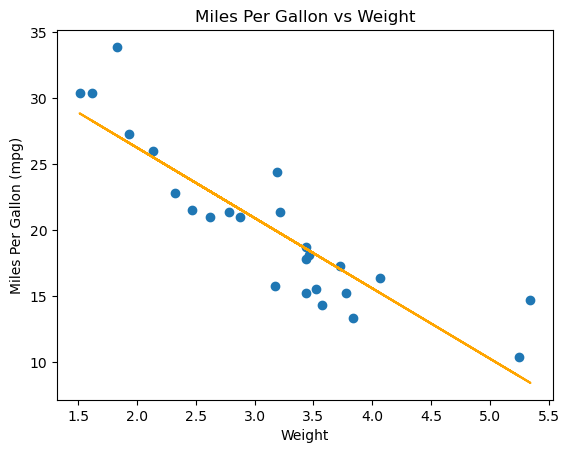

In [32]:
plt.scatter(x_train,Y_train)
plt.plot(x_train, y_pred1, color = "orange")
plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon (mpg)")
plt.title("Miles Per Gallon vs Weight")
plt.show()

Noting down observation, it seems if i dont reshape the target variable data the model is trained better. I find this interesting. Perhaps its cuz of the random state.

Checking the testing data and looking at the predicted values for the testing set.

In [33]:
y_pred2 = linearReg_model.predict(x_test)
y_pred2

array([22.15398263,  7.98974016, 16.41677063, 25.19603923, 20.1259449 ,
       18.5782319 , 17.88442951])

In [34]:
# y = mx + c

y_pred3 = (m* x_test) + c
y_pred3

array([[22.15398263],
       [ 7.98974016],
       [16.41677063],
       [25.19603923],
       [20.1259449 ],
       [18.5782319 ],
       [17.88442951]])

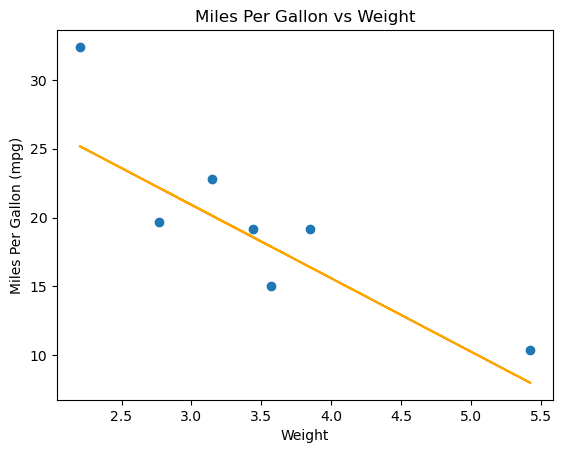

In [35]:
plt.scatter(x_test,Y_test)
plt.plot(x_test, y_pred2, color = "orange")
plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon (mpg)")
plt.title("Miles Per Gallon vs Weight")
plt.show()

With about 20% of the testing data it doesnt look as pretty, perhaps because of the data size. However, it does seem a lot easier to spot the outlier in this case.

## Multiple Linear Regression (40 points):

3.1 Implement a multiple linear regression model using a combination of
independent variables from the "mtcars" dataset

In [36]:


#split dataset in features and target variable
feature_cols = ['cyl', 'disp', 'hp', 'drat', 'wt']
X = mtcars_dataset[feature_cols] # Features
y = mtcars_dataset.mpg # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42) # 80% training and 20% test

In [37]:
multiLinearReg_model = LinearRegression()

multiLinearReg_model.fit(X_train, y_train)

LinearRegression()

In [38]:
c = multiLinearReg_model.intercept_
c

33.6943590758315

In [39]:
m = multiLinearReg_model.coef_
m

array([-0.93251579,  0.01298582, -0.03194703,  1.22293942, -3.38988582])

3.2 Train the model to predict mpg using multiple features

In [40]:
y_pred4 = multiLinearReg_model.predict(X_train)
y_pred4

array([27.31183506, 15.17540508, 22.55078433, 17.50944809, 10.43132932,
       19.31294258, 15.00591079, 14.0228439 , 14.49664815, 21.68636345,
       25.23947176, 26.78257569, 20.80360203, 17.01458236, 27.07081676,
       17.59786759, 29.8405023 , 23.65575163, 24.59383766, 23.58750994,
       19.47891753, 11.60070862, 16.77310415, 27.75139424, 14.90584699])

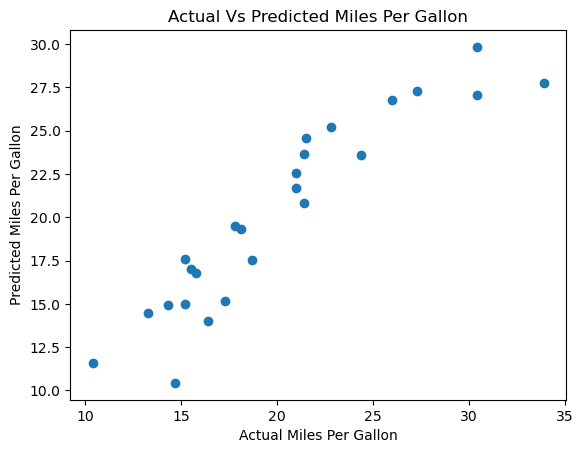

In [41]:
plt.scatter(y_train, y_pred4)
plt.xlabel("Actual Miles Per Gallon")
plt.ylabel("Predicted Miles Per Gallon")
plt.title("Actual Vs Predicted Miles Per Gallon")
plt.show()

To the human eyes this appears to be slightly curved and not very linear. It could be because of the multiple variables I chose to try and predict the target value mpg.

In [42]:
from sklearn.metrics import r2_score

In [43]:
score = r2_score(y_train, y_pred4)
score

0.8572631834562161

Even tho the line is curved it seems that the model is doing better than the simple linear regression model at predicting the training data, with a score of 85%.

In [44]:
y_pred5 = multiLinearReg_model.predict(X_test)
y_pred5

array([19.42853401, 10.62117411, 16.57037127, 26.40961957, 22.87351303,
       19.47891753, 11.66802081])

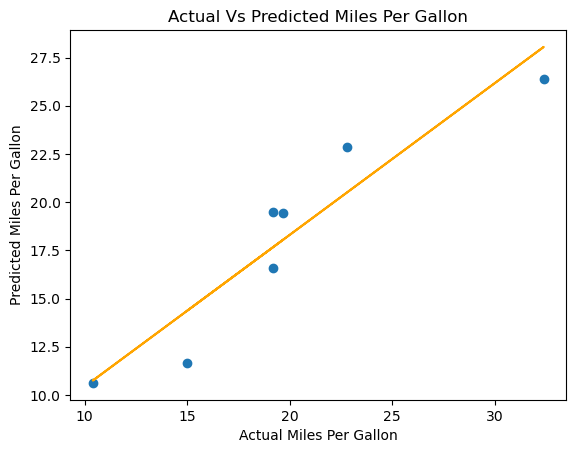

In [45]:
a, b = np.polyfit(y_test, y_pred5, 1)
plt.scatter(y_test, y_pred5)
plt.plot(y_test, a*y_test+b, color = "orange")
#plt.plot(y_test, y_pred5,color = "orange")
plt.xlabel("Actual Miles Per Gallon")
plt.ylabel("Predicted Miles Per Gallon")
plt.title("Actual Vs Predicted Miles Per Gallon")
plt.show()

Even the testing data looks closer to a line and there seems to be 1 perfect value that is situated on the line.

3.3 Evaluate the model's performance using appropriate regression evaluation
metrics (on testing dataset).

I implemented a couple of metrics as none were neccessarily specified. The reason also was because I was reading an article that explained for multi linear regression a few evaluation metrics were needed in order to properly gauge the performance of the model.

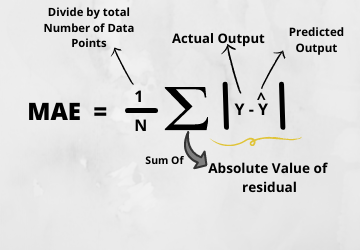

In [46]:
from IPython import display
display.Image("mean_absolute_error formula.png")

In [47]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred5))

MAE 1.828151287251054


The MAE or Mean Absolute Error value represents the error gauge within the data. It is not the best metric but there are some advantages to using it, which were noted in the article (in References section). The smaller the error value the better for the model.

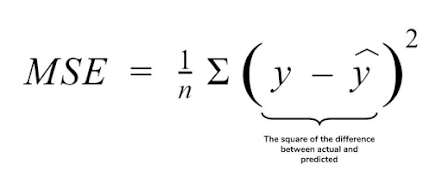

In [48]:
from IPython import display
display.Image("mean_squared_error formula.png")

Mean Squared Error was next and though the value is larger, it is because it has cast aside the outliers in the data and now represents the mean squared error of the distance between the actual and predicted values of the data.

In [49]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred5))

MSE 7.729643024715775


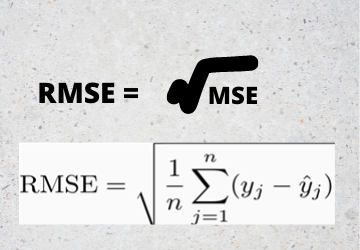

In [50]:
from IPython import display
display.Image("root_mean_squared_error formula.png")

According to the article the output value for Root Mean Squared Error is the in the same unit as the output value for the data. This means that the value represents the target value weight. And it seems that there is a sort of large gap in error when it comes to the weight. As we have seen from the 13 model cars, the weight range is from 1 up to 5.5 approximately.

In [51]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred5)))

RMSE 2.7802235566075932


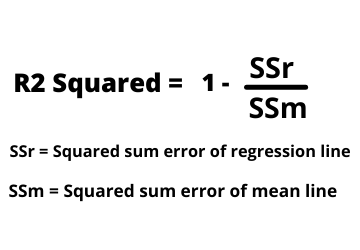

In [52]:
from IPython import display
display.Image("r_squared formula.png")

The r2 squared formula says how much of the data can be explained by the variables. So far 80% of the data can be explained by the variables I have chosen.

In [53]:
score1 = r2_score(y_test, y_pred5)
score1

0.8066819917053353

## Discussion and Conclusion (20 points):

4.1 Compare the performance and interpretability of the simple linear regression
model with the multiple linear regression model. Discuss the trade-offs
between simplicity and complexity

There is a small difference between the performance and interpretability of the simple linear regression model and the multiple linear regression model. Starting off the simiple regression model had 1 input variable and 1 output target variable to focus on. There was still a high accuracy range from the model and it seemed if we trained it further the score would improve significantly. Then we have the multiple linear regression model, in which it did better than the simple linear regression model which was to be expected. But the performance gauge is smaller than I would have thought just from a quick observation. There were multiple variables chosen which seemed to have a strong correlation with mpg. I do believe with further training and more data it could also definitely improve. As for the trade offs uh the simplicity gave me a clear understanding of the model while the complexity was pretty foggy as I was unsure which variables were contributing to the prediction of the target variable.

4.2 Reflect on the insights gained from the assignment and the implications for
predicting fuel efficiency in car models.

Insights I have gained were that linear regression metrics are very similar to what I have done in secondary school when it comes to the intercept formula especially. So it was handy to have my memory refreshed. There were no null values in the data. However, I did note that there may have been outliers instead. I did not deal with them as I wanted tos ee how the model would do with the outliers. It seems that I am on the right track when it comes to the variables I have chosen to predict mpg. I believe with more time, quality data and resources the model could get closer to perfection

## References

where I downloaded the dataset from:

https://gist.github.com/seankross/a412dfbd88b3db70b74b


Dictionary for the meanings

https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars

Correlation metrics

https://www.analyticsvidhya.com/blog/2021/09/different-type-of-correlation-metrics-used-by-data-scientist/

Tutorials

https://youtu.be/feDJkDaNuOk?si=54Xi_Rn8ezbocjpN

https://scikit-learn.org/stable/modules/linear_model.html

https://realpython.com/linear-regression-in-python/

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

Evaluation Metrics

https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/